## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [19]:
boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7777777) 
regr_1 = DecisionTreeRegressor()
regr_1.fit(X_train, y_train)

DecisionTreeRegressor()

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [11]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train) #Caminho dos CCP_alphas e MSE da árvore
path

{'ccp_alphas': array([0.00000000e+00, 2.99965271e-16, 2.99965271e-16, 5.99930542e-16,
        8.99895813e-16, 1.19986108e-15, 1.31926121e-05, 1.31926121e-05,
        1.31926121e-05, 1.31926121e-05, 1.31926121e-05, 1.31926121e-05,
        1.31926121e-05, 1.31926121e-05, 1.31926121e-05, 1.31926121e-05,
        1.31926121e-05, 1.31926121e-05, 1.31926121e-05, 1.31926121e-05,
        1.31926121e-05, 1.31926121e-05, 1.31926121e-05, 1.31926121e-05,
        1.31926121e-05, 1.31926121e-05, 1.31926121e-05, 1.75901495e-05,
        1.75901495e-05, 3.95778364e-05, 3.95778364e-05, 5.27704485e-05,
        5.27704485e-05, 5.27704485e-05, 5.27704485e-05, 5.27704485e-05,
        5.27704485e-05, 5.27704485e-05, 5.27704485e-05, 5.27704485e-05,
        5.27704485e-05, 5.27704485e-05, 5.27704485e-05, 5.27704485e-05,
        7.03605981e-05, 7.03605981e-05, 7.03605981e-05, 7.03605981e-05,
        1.06420405e-04, 1.09938434e-04, 1.09938434e-04, 1.18733509e-04,
        1.18733509e-04, 1.18733509e-04, 1.18733509

In [12]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities # Separando os ccp alphas das impurezas

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [13]:
clfs = []  #Treinando as árvores com cada ccp_alpha e salvando em uma lista

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [17]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs] #Criando uma lista com os MSE de cada base de treino e teste
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

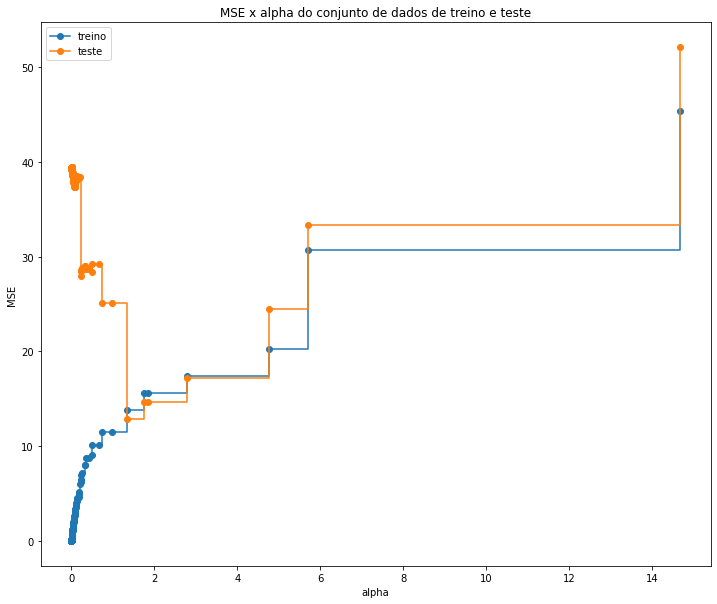

In [40]:
plt.rc('figure', figsize=(12, 10)) 

# Criando um gráfico entre os MSE e alpha dos conjuntos de treino e teste
fig, ax = plt.subplots()

ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [37]:
#Calculando o R-quadrado da árvore com o ccp_alpha otimizado

arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha= 1.75)
arvore_final.fit(X_train,y_train)

print(f"Profundidade: {arvore_final.tree_.max_depth}")

print(f"R-quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}")

print(f"MSE na base de testes:{mean_squared_error(y_test , arvore_final.predict(X_test)):2f}")

Profundidade: 4
R-quadrado na base de testes: 0.86
MSE na base de testes:12.877754


### 7. Visualize esta árvore.

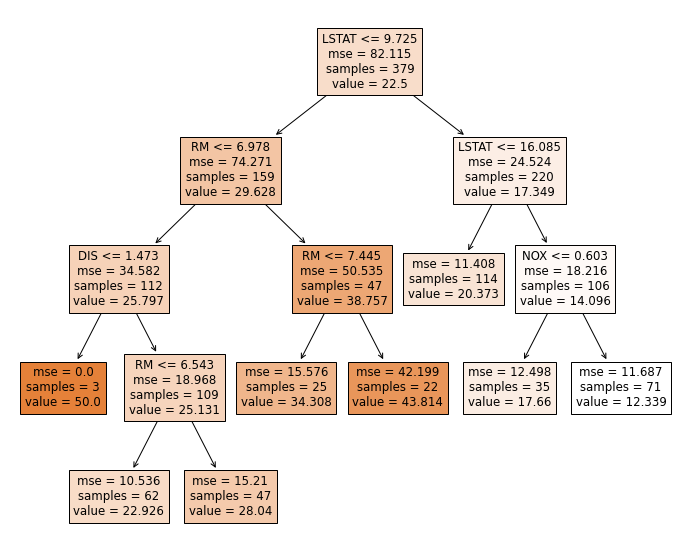

In [39]:
#Visualizando a árvore depois da pós poda
tp = tree.plot_tree(arvore_final, 
                    feature_names=X.columns,  
                    filled=True) 